In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas 
import math


./data/green_spring_400g.csv : k =  45.741893985910174 ± 0.45876103216027786 N/s
./data/red_spring_400g.csv : k =  20.862480905124496 ± 0.08862753875323486 N/s
./data/white_spring_300g.csv : k =  32.71473645568083 ± 0.12941267370051512 N/s


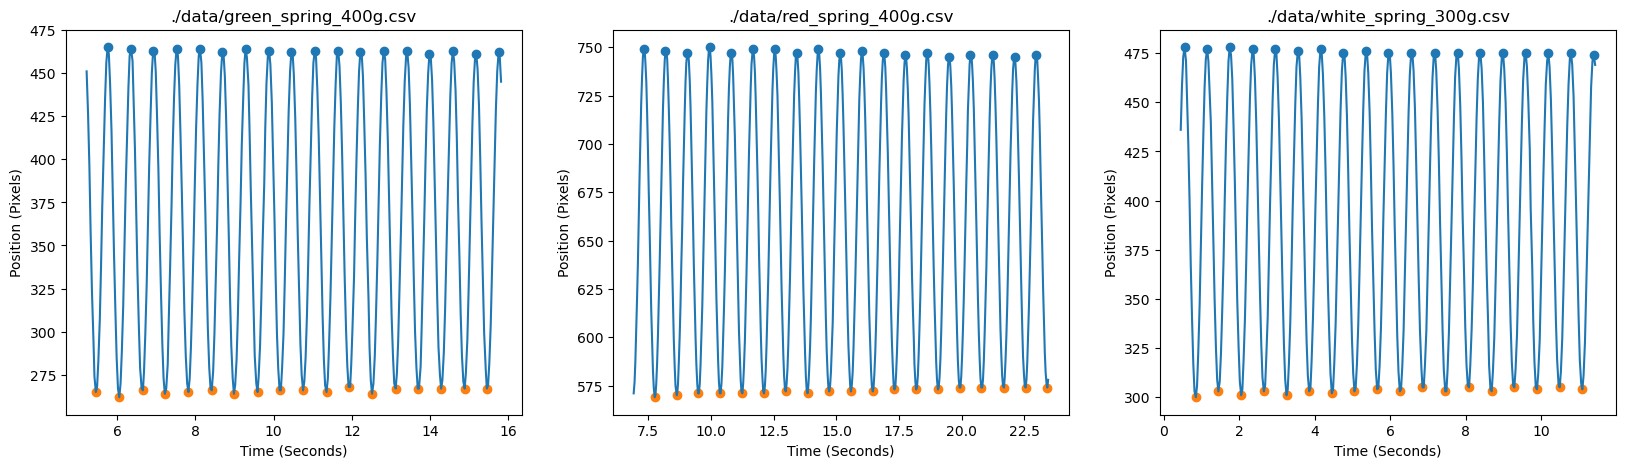

In [29]:
def run(CSV_INPUT, OFFSET, WEIGHT_MASS, axs):
    data = pandas.read_csv(CSV_INPUT)
    data = data[OFFSET:]
    data['timestamp'] = data['timestamp'] / 1000

    axs.set_title(CSV_INPUT)
    axs.set_xlabel("Time (Seconds)")
    axs.set_ylabel("Position (Pixels)")
    axs.plot(data['timestamp'], data['position_px_y-green'])
    maxs = data[(data['position_px_y-green'].shift(1) < data['position_px_y-green']) & (data['position_px_y-green'].shift(-1) <= data['position_px_y-green'])]
    mins = data[(data['position_px_y-green'].shift(1) > data['position_px_y-green']) & (data['position_px_y-green'].shift(-1) >= data['position_px_y-green'])]
    axs.scatter(maxs['timestamp'], maxs['position_px_y-green'])
    axs.scatter(mins['timestamp'], mins['position_px_y-green'])

    periods = np.append(np.array(mins.diff()['timestamp'].dropna()), np.array(maxs.diff()['timestamp'].dropna()))
    omegas = 2 * math.pi / periods 
    ks = omegas ** 2 * WEIGHT_MASS

    k_avg = np.average(ks)
    k_uncert = np.std(ks) / math.sqrt(len(ks))

    print(CSV_INPUT, ": k = ", k_avg, "±", k_uncert, "N/s")


fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
run("./data/green_spring_400g.csv", 150, 0.4, axs[0])
run("./data/red_spring_400g.csv", 200, 0.4, axs[1])
run("./data/white_spring_300g.csv", 10, 0.3, axs[2])
